In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [4]:
data = data.replace('tested_positive', 1)
data = data.replace('tested_negative', 0)
data.tail()

,preg,plas,pres,skin,insu,mass,pedi,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


class
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

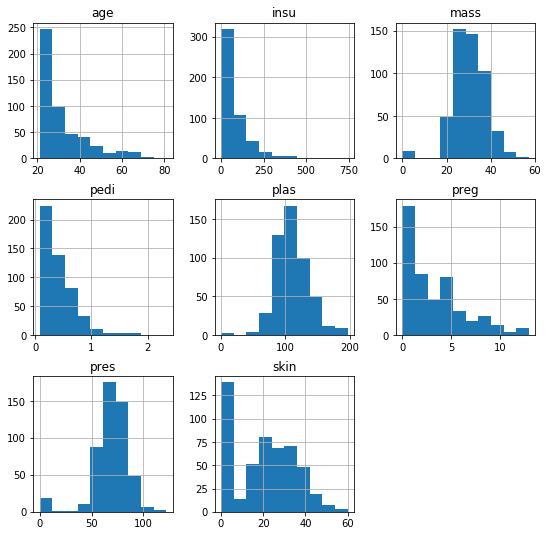

In [10]:
data[data['class'] == 0].groupby('class').hist(figsize=(9, 9))

class
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

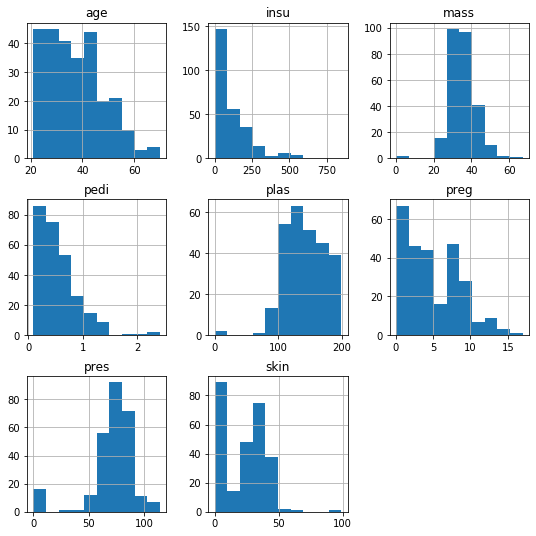

In [11]:
data[data['class'] == 1].groupby('class').hist(figsize=(9, 9))

In [12]:
def sigmoid(z):
    h = 1 / (1 + np.exp(-z))
    return h

In [13]:
def init_theta(features):
    theta = np.zeros([features, 1])
    theta0 = 0.0
    return theta, theta0

In [19]:
def forward_propagation(theta, theta0, X_train, y_train, reg_lambda):
    z = np.dot(theta.T, X_train) + theta0
    h = sigmoid(z)
    n = X_train.shape[1]
    cost = - y_train * np.log(h) - (1 - y_train) * np.log(1 - h)
    cost = (np.sum(cost)) / n + reg_lambda / (2 * n) * np.sum(theta ** 2)
    # backward propagation
    derivative_weight = (np.dot(X_train, ((h - y_train).T))) / n 
    derivative_bias = np.sum(h - y_train) / n
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    return cost, gradients

In [46]:
def update(theta, theta0, X_train, y_train, alpha, epochs, reg_lambda):
    cost_list = []
    cost_list_tenth = [] # tracking tenth cost
    index = []
    
    for i in range(epochs):
        cost, gradients = forward_propagation(theta, theta0, X_train, y_train, reg_lambda)
        cost_list.append(cost)
        
        theta = theta - alpha * gradients["derivative_weight"]
        theta0 = theta0 - alpha * gradients["derivative_bias"]
        #print ("Thetas : {}".format(theta)) 
        
        if i % 10 == 0:
            cost_list_tenth.append(cost)
            index.append(i)
            #print ("Cost after epochs % i: % f" %(i, cost)) 
            
    parameters = {"weight": theta, "bias": theta0}
    # h = theta * X + theta0
    plt.plot(index, cost_list_tenth)
        
    return parameters, gradients, cost_list

In [47]:
def predict(theta, theta0, X_test):
    z = sigmoid(np.dot(theta.T, X_test) + theta0)
    y_prediction = np.zeros((1, X_test.shape[1]))
    
    for i in range(z.shape[1]):
        if z[0, i] <= 0.5:
            y_prediction[0, i] = 0
        else:
            y_prediction[0, i] = 1
    
    return y_prediction

In [63]:
def logistic_regression(X_train, y_train, X_test, y_test, alpha, epochs, reg_lambda):
    m = X_train.shape[0]
    theta, theta0 = init_theta(m)
    
    parameters, gradients, cost_list = update(theta, theta0, X_train, y_train, alpha, epochs, reg_lambda)

    y_prediction_test = predict(parameters["weight"], parameters["bias"], X_test)
    y_prediction_train = predict(parameters["weight"], parameters["bias"], X_train)
    
    print ("Train accuracy: {:.2f}%".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print ("Test accuracy: {:.2f}%".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
    return parameters, gradients, cost_list

In [49]:
X = data.drop(['class'], axis=1).values
X = (X - X.min()) / (X.max() - X.min())

In [50]:
y = data['class'].values

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(614, 8) (614,) (154, 8) (154,)


In [52]:
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

In [53]:
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8, 614) (614,) (8, 154) (154,)


Train accuracy: 64.50%
Test accuracy: 67.53%


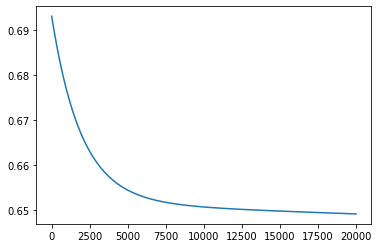

In [64]:
parameters, gradients, cost_list = logistic_regression(X_train, y_train, X_test, y_test, alpha = 0.001, epochs = 20000, reg_lambda = 5)

In [101]:
print ('Predicted value : {}'.format(predict(parameters['weight'], parameters['bias'], X_test[:, -1, np.newaxis])))
print ('Actual value : {}'.format(y_test[-1]))

Predicted value : [[0.]]
Actual value : 0
